In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import json
import glob

In [2]:
def log4(x):
    return np.log(x) / np.log(4)

def f(x, a, b):
    return a * (np.power(x, b))

In [5]:
files = glob.glob('data/**/properties.json')
data = [json.load(open(file)) for file in files]
df = pd.DataFrame(data)
df['conductance'] = df['conductance'].astype(float)
df.drop_duplicates(subset=['name'], inplace=True)
df.rename(columns={'pairable': 'is_junction_pairable'}, inplace=True)

df["max_permanent"] = df["pathsdetailed"].apply(lambda x: max([path["permanent"] for path in x]))
df["min_permanent"] = df["pathsdetailed"].apply(lambda x: min([path["permanent"] for path in x]))

# Remove all with min_permanent == -1
df = df[df["min_permanent"] != -1]

display(df)

KeyError: Index(['name'], dtype='object')

In [311]:
# df = df.explode('paths')
# df['path_length'] = df['paths'].apply(lambda x: x['length'])
# df['pairable_paths'] = df['paths'].apply(lambda x: x['pairable'])
# df['unpairable_paths'] = df['paths'].apply(lambda x: x['unpairable'])
# df['pairable_ratio'] = df['paths'].apply(lambda x: x['pairable'] / (x['pairable'] + x['unpairable']))
# df.drop('paths', axis=1, inplace=True)
# df = df.reset_index(drop=True)
# display(df)

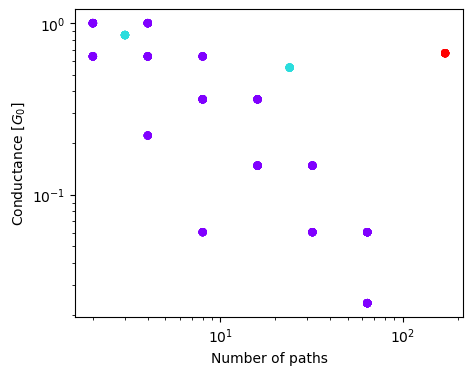

In [312]:
# Extract informations

filtered_df = df.query("is_junction_pairable == True")
conductance = filtered_df['conductancelog'].values
number_of_paths = []
number_of_pairable_paths = []
for _, row in filtered_df.iterrows():
    paths: list[dict] = row["paths"]
    number_of_paths.append(sum([path["pairable"] + path["unpairable"] for path in paths]))
    number_of_pairable_paths.append(sum([path["pairable"] for path in paths]))
number_of_paths = np.array(number_of_paths)
number_of_pairable_paths = np.array(number_of_pairable_paths)

# Draw figure

fig, ax = plt.subplots(figsize=(5, 4))
MAX_PERM = filtered_df["max_permanent"].max()
color = plt.cm.rainbow(log4(filtered_df["max_permanent"]) / log4(MAX_PERM))
ax.scatter(number_of_paths, 10**conductance, alpha=1, linewidths=0, color=color)
for i, row in filtered_df.reset_index().iterrows():
    pass
    # ax.text(number_of_pairable_paths[i], 10**conductance[i], row["max_permanent"], fontsize=8)
ax.set_xlabel('Number of paths')
ax.set_ylabel('Conductance [$G_0$]')
ax.set_xscale('log')
ax.set_yscale('log')

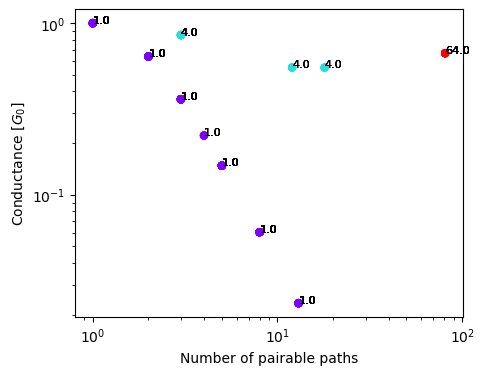

In [314]:
# Extract informations

filtered_df = df.query("is_junction_pairable == True & max_permanent > 0")
conductance = filtered_df['conductancelog'].values
number_of_paths = []
number_of_pairable_paths = []
for _, row in filtered_df.iterrows():
    paths: list[dict] = row["paths"]
    number_of_paths.append(sum([path["pairable"] + path["unpairable"] for path in paths]))
    number_of_pairable_paths.append(sum([path["pairable"] for path in paths]))
number_of_paths = np.array(number_of_paths)
number_of_pairable_paths = np.array(number_of_pairable_paths)

# Draw figure

fig, ax = plt.subplots(figsize=(5, 4))
MAX_PERM = filtered_df["max_permanent"].max()
color = plt.cm.rainbow(log4(filtered_df["max_permanent"]) / log4(MAX_PERM))
ax.scatter(number_of_pairable_paths, 10**conductance, alpha=1, linewidths=0, color=color)
for i, row in filtered_df.reset_index().iterrows():
    pass
    ax.text(number_of_pairable_paths[i], 10**conductance[i], row["max_permanent"], fontsize=8)
for perm in [1, 4, 16, 64, 256, 1024]:
    df_perm = filtered_df.query(f"max_permanent == @perm")
    local_number_of_pairable_paths = []
    local_conductance = []
    for _, row in df_perm.iterrows():
        paths: list[dict] = row["paths"]
        local_number_of_pairable_paths.append(sum([path["pairable"] for path in paths]))
        local_conductance.append(row["conductancelog"])
    # x = np.array(local_number_of_pairable_paths)
    # y = 10**np.array(local_conductance)
    # if len(x) >= 2:
    #     popt, pcov = curve_fit(f, x, y)
    #     X = np.linspace(1, x.max(), 100)
    #     Y = f(X, *popt)
    #     ax.plot(X, Y, ",", label=f"{perm}", color=plt.cm.rainbow(log4(perm) / log4(MAX_PERM)))
ax.set_xlabel('Number of pairable paths')
ax.set_ylabel('Conductance [$G_0$]')
ax.set_xscale('log')
ax.set_yscale('log')

In [307]:
f(x, *popt)

array([], dtype=float64)

In [308]:
df.query("is_junction_pairable == True").sort_values("max_permanent", ascending=False).head(10)

,name,nodes,edges,conductancelog,is_junction_pairable,determinant,permanent,pathsdetailed,paths,max_permanent
431,junction_(30_37_74_729)_(28_33_66_195)_3336,30,37,-0.1752,True,-729,-1,"[{'path': '14-28-11-24-7-20-3-19-2-18-1-17', '...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
860,junction_(30_37_74_729)_(28_33_66_195)_9457,30,37,-0.1752,True,-729,-1,"[{'path': '12-25-8-24-7-20-3-19-2-16-0-15', 'l...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
928,junction_(30_37_74_729)_(28_33_66_195)_4793,30,37,-0.1752,True,-729,-1,"[{'path': '14-28-11-24-7-20-3-19-2-18-1-17', '...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
446,junction_(30_37_74_729)_(28_33_66_195)_5077,30,37,-0.1752,True,-729,-1,"[{'path': '12-25-8-24-7-20-3-19-2-16-0-15', 'l...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
861,junction_(30_37_74_729)_(28_33_66_195)_5927,30,37,-0.1752,True,-729,-1,"[{'path': '12-25-8-24-7-20-3-19-2-16-0-15', 'l...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
195,junction_(30_37_74_729)_(28_33_66_195)_8927,30,37,-0.1752,True,-729,-1,"[{'path': '14-28-11-24-7-20-3-19-2-18-1-17', '...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
642,junction_(30_37_74_729)_(28_33_66_195)_7947,30,37,-0.1752,True,-729,-1,"[{'path': '14-28-11-24-7-20-3-19-2-18-1-17', '...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
226,junction_(30_37_74_729)_(28_33_66_195)_5339,30,37,-0.1752,True,-729,-1,"[{'path': '14-28-11-24-7-20-3-19-2-18-1-17', '...","[{'length': 12, 'pairable': 8, 'unpairable': 6...",64.0
441,junction_(30_37_74_729)_(28_33_66_169)_9827,30,37,-0.2139,True,-729,-1,"[{'path': '12-25-8-24-7-20-3-19-2-18-1-17', 'l...","[{'length': 12, 'pairable': 0, 'unpairable': 1...",16.0
855,junction_(30_37_74_729)_(28_33_66_169)_7542,30,37,-0.2139,True,-729,-1,"[{'path': '12-25-8-24-7-20-3-19-2-18-1-17', 'l...","[{'length': 12, 'pairable': 0, 'unpairable': 1...",16.0
